Plots of the observations, the mask and some histograms based on the observations.      
The interpolation will be performed in notebook [interp_Calanus](interp_Calanus.ipynb).

In [84]:
using CSV
using Dates
using DelimitedFiles 
using NCDatasets
using PyPlot
using DIVAnd
using Statistics
const plt=PyPlot

using PyCall
using PyPlot
colors = PyCall.pyimport("matplotlib.colors")
ccrs = PyCall.pyimport("cartopy.crs")
cfeature = PyCall.pyimport("cartopy.feature")
mticker = PyCall.pyimport("matplotlib.ticker")
coast = cfeature.GSHHSFeature(scale="full");
cartopyticker = PyCall.pyimport("cartopy.mpl.ticker")
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
cmocean = PyCall.pyimport("cmocean")

include("../src/InterpCalanus.jl")
makeplot = true
usecartopy = false

false

## 1. Setting
### 1.1 Colors, domain, projection 

In [4]:
mycolor = "#6667AB"
mycolor2 = "#456A30" # Green treetop
dom = [-20.5, 11.75, 41.25, 67.]
mainproj = ccrs.Mercator(central_longitude=0.5*(dom[1] + dom[2]),
    min_latitude=dom[3], max_latitude=dom[4])
datacrs = ccrs.PlateCarree();

### 1.2 Files and directories

In [5]:
datadir = "../data/"
figdir = "../figures/L05"
resdir = "../results/L05"
resdirm = "../results/monthly/L05"
isdir(resdir) ? @debug("already there") : mkpath(resdir)
isdir(resdirm) ? @debug("already there") : mkpath(resdirm)
isdir(figdir) ? @debug("already there") : mkpath(figdir)
datafile = joinpath(datadir, "MBA_CPRdata_Emodnet_21Jan22.csv")
isfile(datafile) ? @debug("already downloaded") : download("https://dox.ulg.ac.be/index.php/s/hjWKf1F3C1Pzz1r/download", datafile)
bathfile = joinpath(datadir, "gebco_30sec_16.nc")
isfile(datafile), isfile(bathfile)

(true, true)

### 1.3 Grid configuration

In [6]:
Δlon = 0.5
Δlat = 0.5
longrid = dom[1]:Δlon:dom[2]
latgrid = dom[3]:Δlat:dom[4]

41.25:0.5:66.75

## 2. Analysis preparation
### 2.1 Metrics

In [7]:
_, (pm, pn), (xi, yi) = DIVAnd_rectdom(longrid, latgrid);
@info(size(xi));

┌ Info: (65, 52)
└ @ Main In[7]:2


### Prepare mask

In [19]:
bx, by, b = DIVAnd.load_bath(bathfile, true, longrid, latgrid)
@show size(b), size(bx), size(by)

(size(b), size(bx), size(by)) = ((65, 52), (65,), (52,))


((65, 52), (65,), (52,))

In [31]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=mainproj)
pcm = ax.pcolor(bbx, bby, b, transform=datacrs)
plt.savefig("/home/ctroupin/test2d.jpg")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/ctroupin/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("draw_wrapper() got an unexpected keyword argument 'inframe'")
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 977, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 3058, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2295, in print_figure
    self.figure.draw(renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 2846, in draw
    renderer, self, artists, self.suppressComposite)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py", line 388, in draw
    inframe=inframe)


In [21]:
if makeplot
    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)
    pcm = ax.pcolormesh(bbx, bby, b, vmin=0., cmap=plt.cm.gist_earth, transform=datacrs)
    ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                          linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)

    cb = plt.colorbar(pcm, orientation="vertical")
    cb.set_label("Depth (m)", rotation=0, ha="left")
    plt.savefig(joinpath(figdir, "domain_bathy_050"), dpi=300, bbox_inches="tight")
    plt.close()
end

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/ctroupin/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('too many values to unpack (expected 3)')
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py", line 1459, in pcolormesh
    result = self._pcolormesh_patched(*args, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py", line 1491, in _pcolormesh_patched
    X, Y, C = self._pcolorargs('pcolormesh', *args, allmatch=allmatch)


In [82]:
_, _, mask = DIVAnd.load_mask(bathfile, true, longrid, latgrid, 0.0);
# Remove Mediterranean Sea

# - Resolution = 0.1°
# mask[220:end,1:60] .= 0;

# - Resolution = 0.5°
maskindex = findall((xi .>= 0.) .& (yi .<= 47.))
mask[maskindex] .= 0.;

In [83]:
if makeplot

    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)
    pcm = ax.pcolormesh(bx, by, mask', cmap=PyPlot.cm.binary, transform=datacrs)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
        linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)

    # plt.savefig(joinpath(figdir, "domain_mask_050"), dpi=300, bbox_inches="tight")
    plt.show()
end

## Data reading
### Read the CSV files and separate by columns

In [34]:
@time lon, lat, dates, calanus_finmarchicus, calanus_helgolandicus = InterpCanalus.read_data_calanus(datafile);

  1.077588 seconds (5.74 M allocations: 196.186 MiB, 9.02% gc time, 53.75% compilation time)


┌ Info: (-20.447, 11.703)
└ @ Main.InterpCanalus /home/ctroupin/Projects/EMODnet/EMODnet-Bio-Interp-Calanus/src/InterpCalanus.jl:27
┌ Info: (41.2567, 66.808)
└ @ Main.InterpCanalus /home/ctroupin/Projects/EMODnet/EMODnet-Bio-Interp-Calanus/src/InterpCalanus.jl:28


In [67]:
yearcount, monthcount = InterpCanalus.count_years_months(dates)

┌ Info: 60
└ @ Main.InterpCanalus /home/ctroupin/Projects/EMODnet/EMODnet-Bio-Interp-Calanus/src/InterpCalanus.jl:50


([2364.0, 2321.0, 2382.0, 2564.0, 2465.0, 2556.0, 2777.0, 2422.0, 2679.0, 2489.0  …  2515.0, 2764.0, 2747.0, 2517.0, 2827.0, 2798.0, 2486.0, 2695.0, 2041.0, 2206.0], [10608.0, 11745.0, 12808.0, 12546.0, 12452.0, 12122.0, 12662.0, 12530.0, 12513.0, 12623.0, 12232.0, 11317.0])

### Year histogram

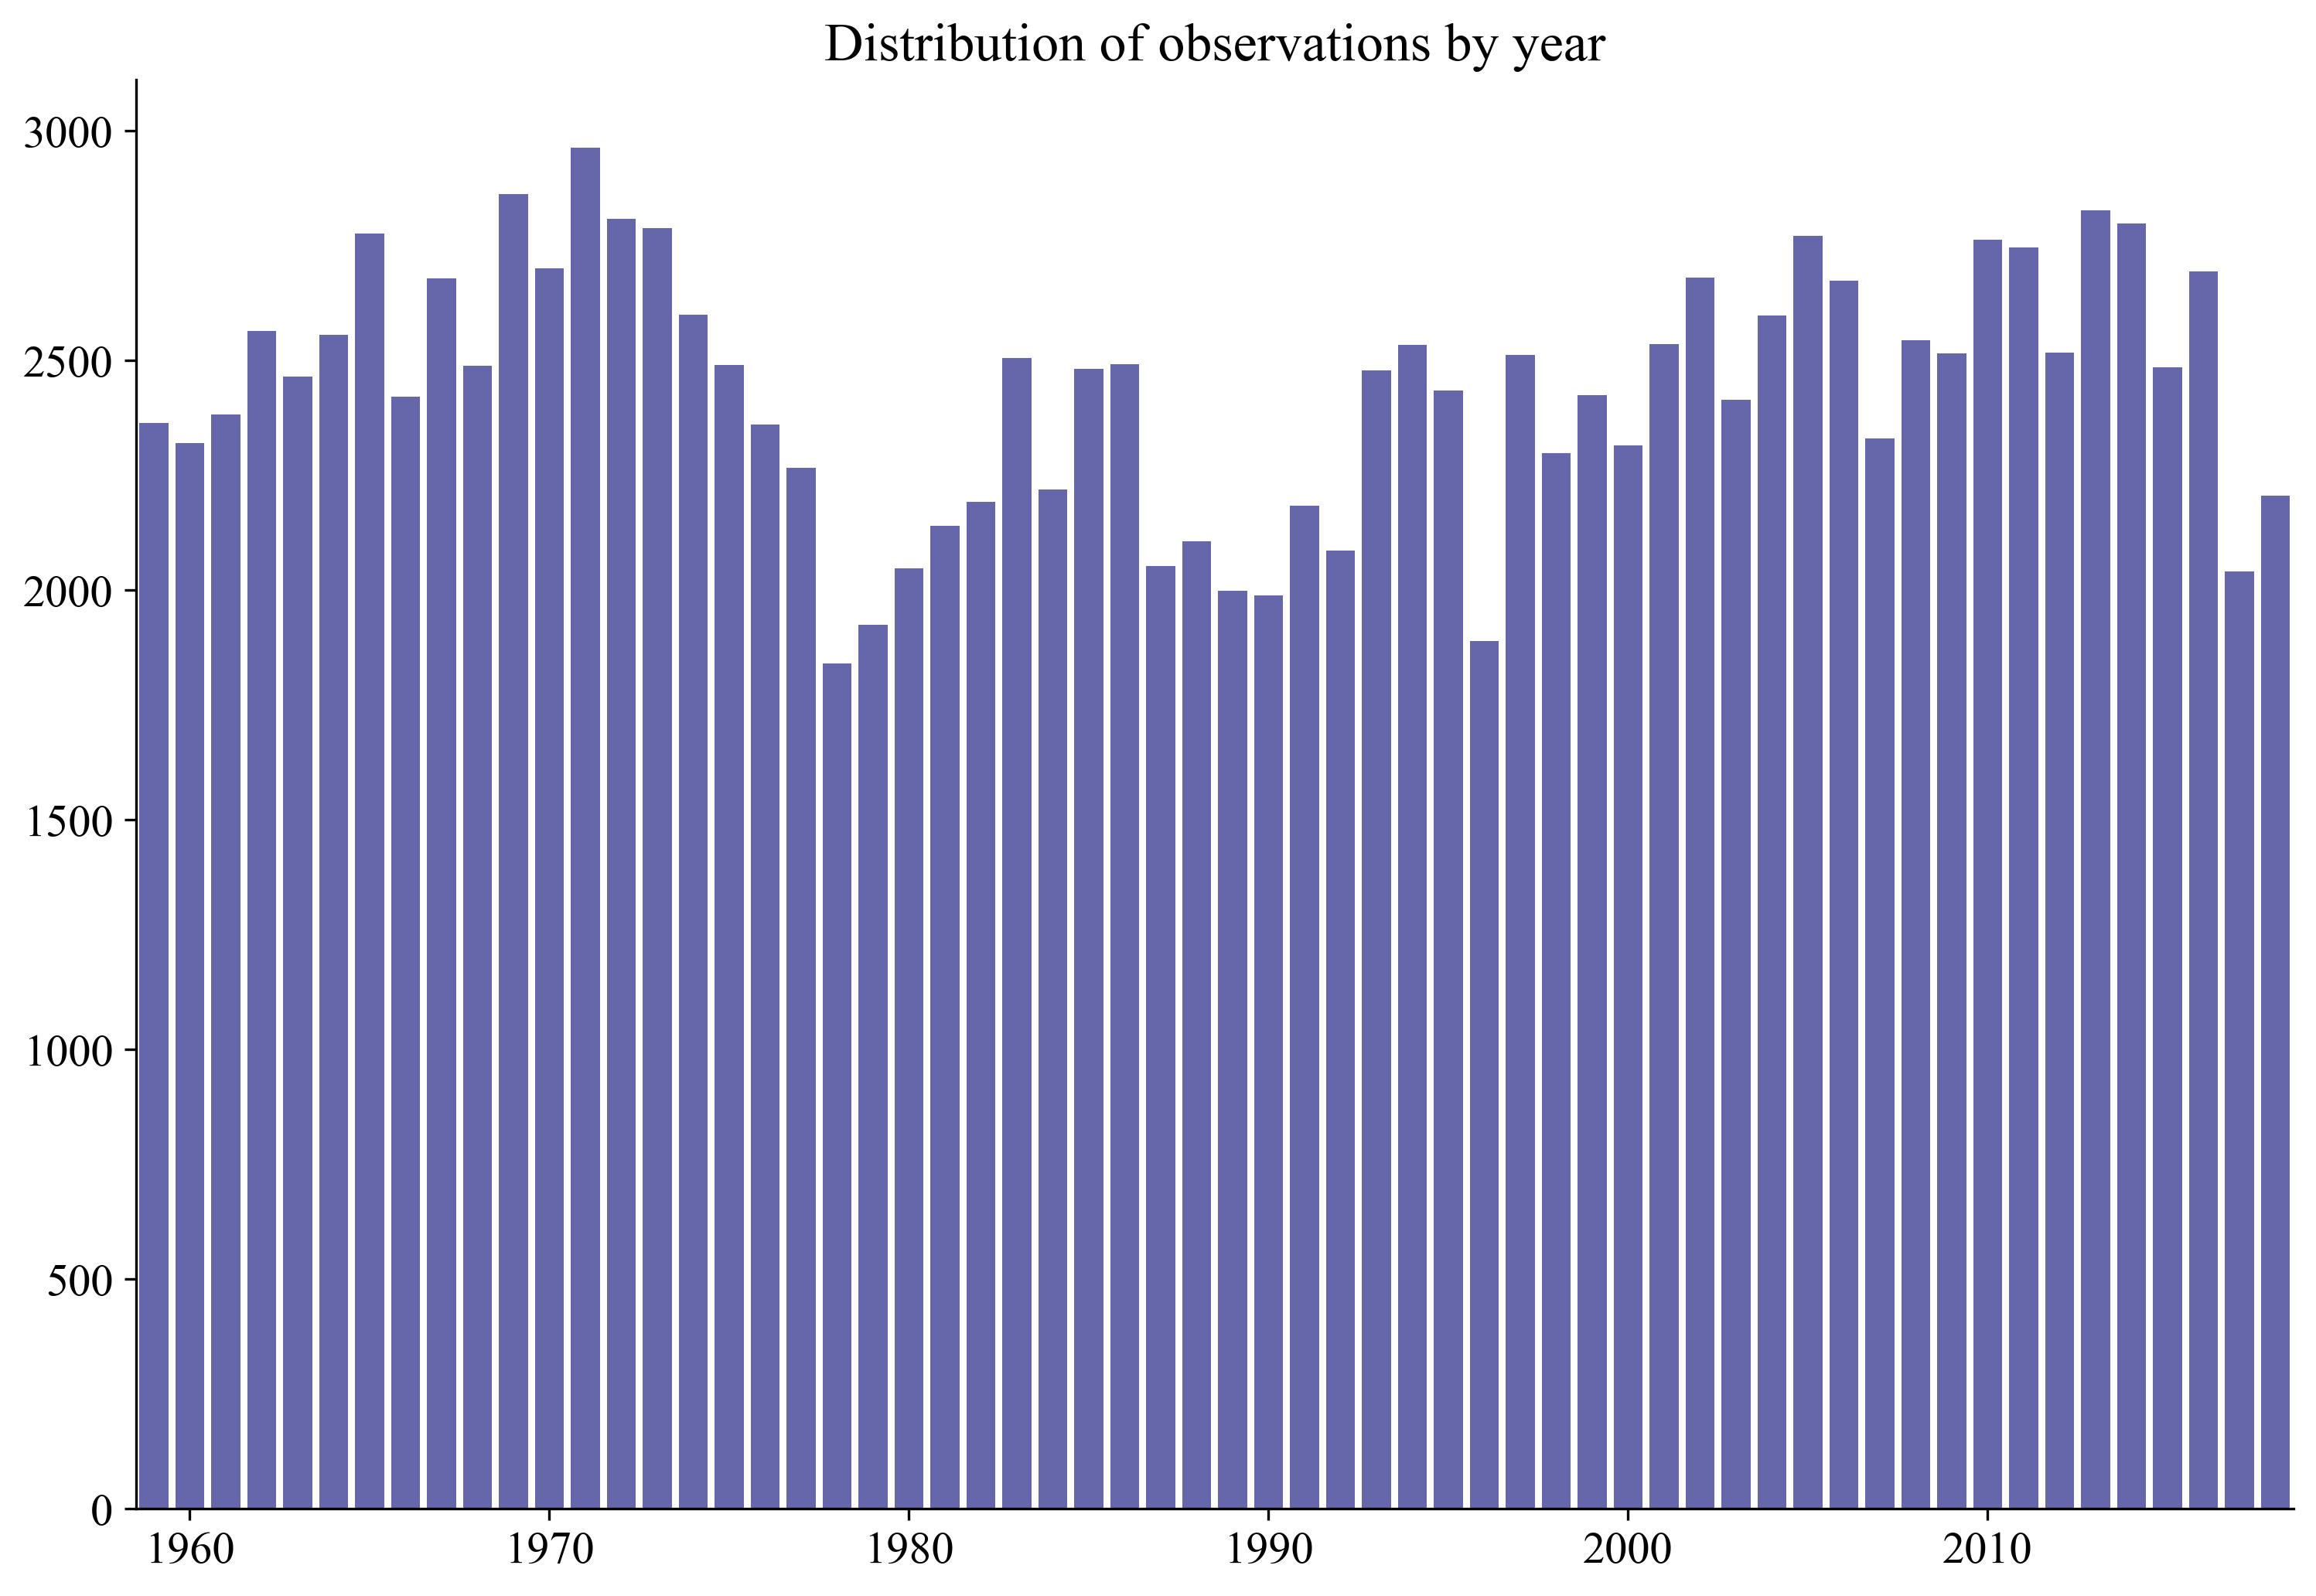

In [87]:
if makeplot
    years = Dates.year.(dates)
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111)
    plt.bar(minimum(years):maximum(years), yearcount, color=mycolor)
    ax.set_xlim(minimum(years) - 0.5, maximum(years) + 0.5)
    ax.set_title("Distribution of observations by year")
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    plt.savefig(joinpath(figdir, "time_histogram_year"), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
end

### Month histogram

In [90]:
if makeplot
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111)
    plt.bar(1:12, monthcount, color=mycolor)
    ax.set_title("Distribution of observations by month")
    ax.set_xlim(0.5, 12.5)
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.set_xticks(collect(1:12), Dates.monthname.(1:12))
    fig.autofmt_xdate()
    plt.savefig(joinpath(figdir, "time_histogram_month"), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
end

### Polar

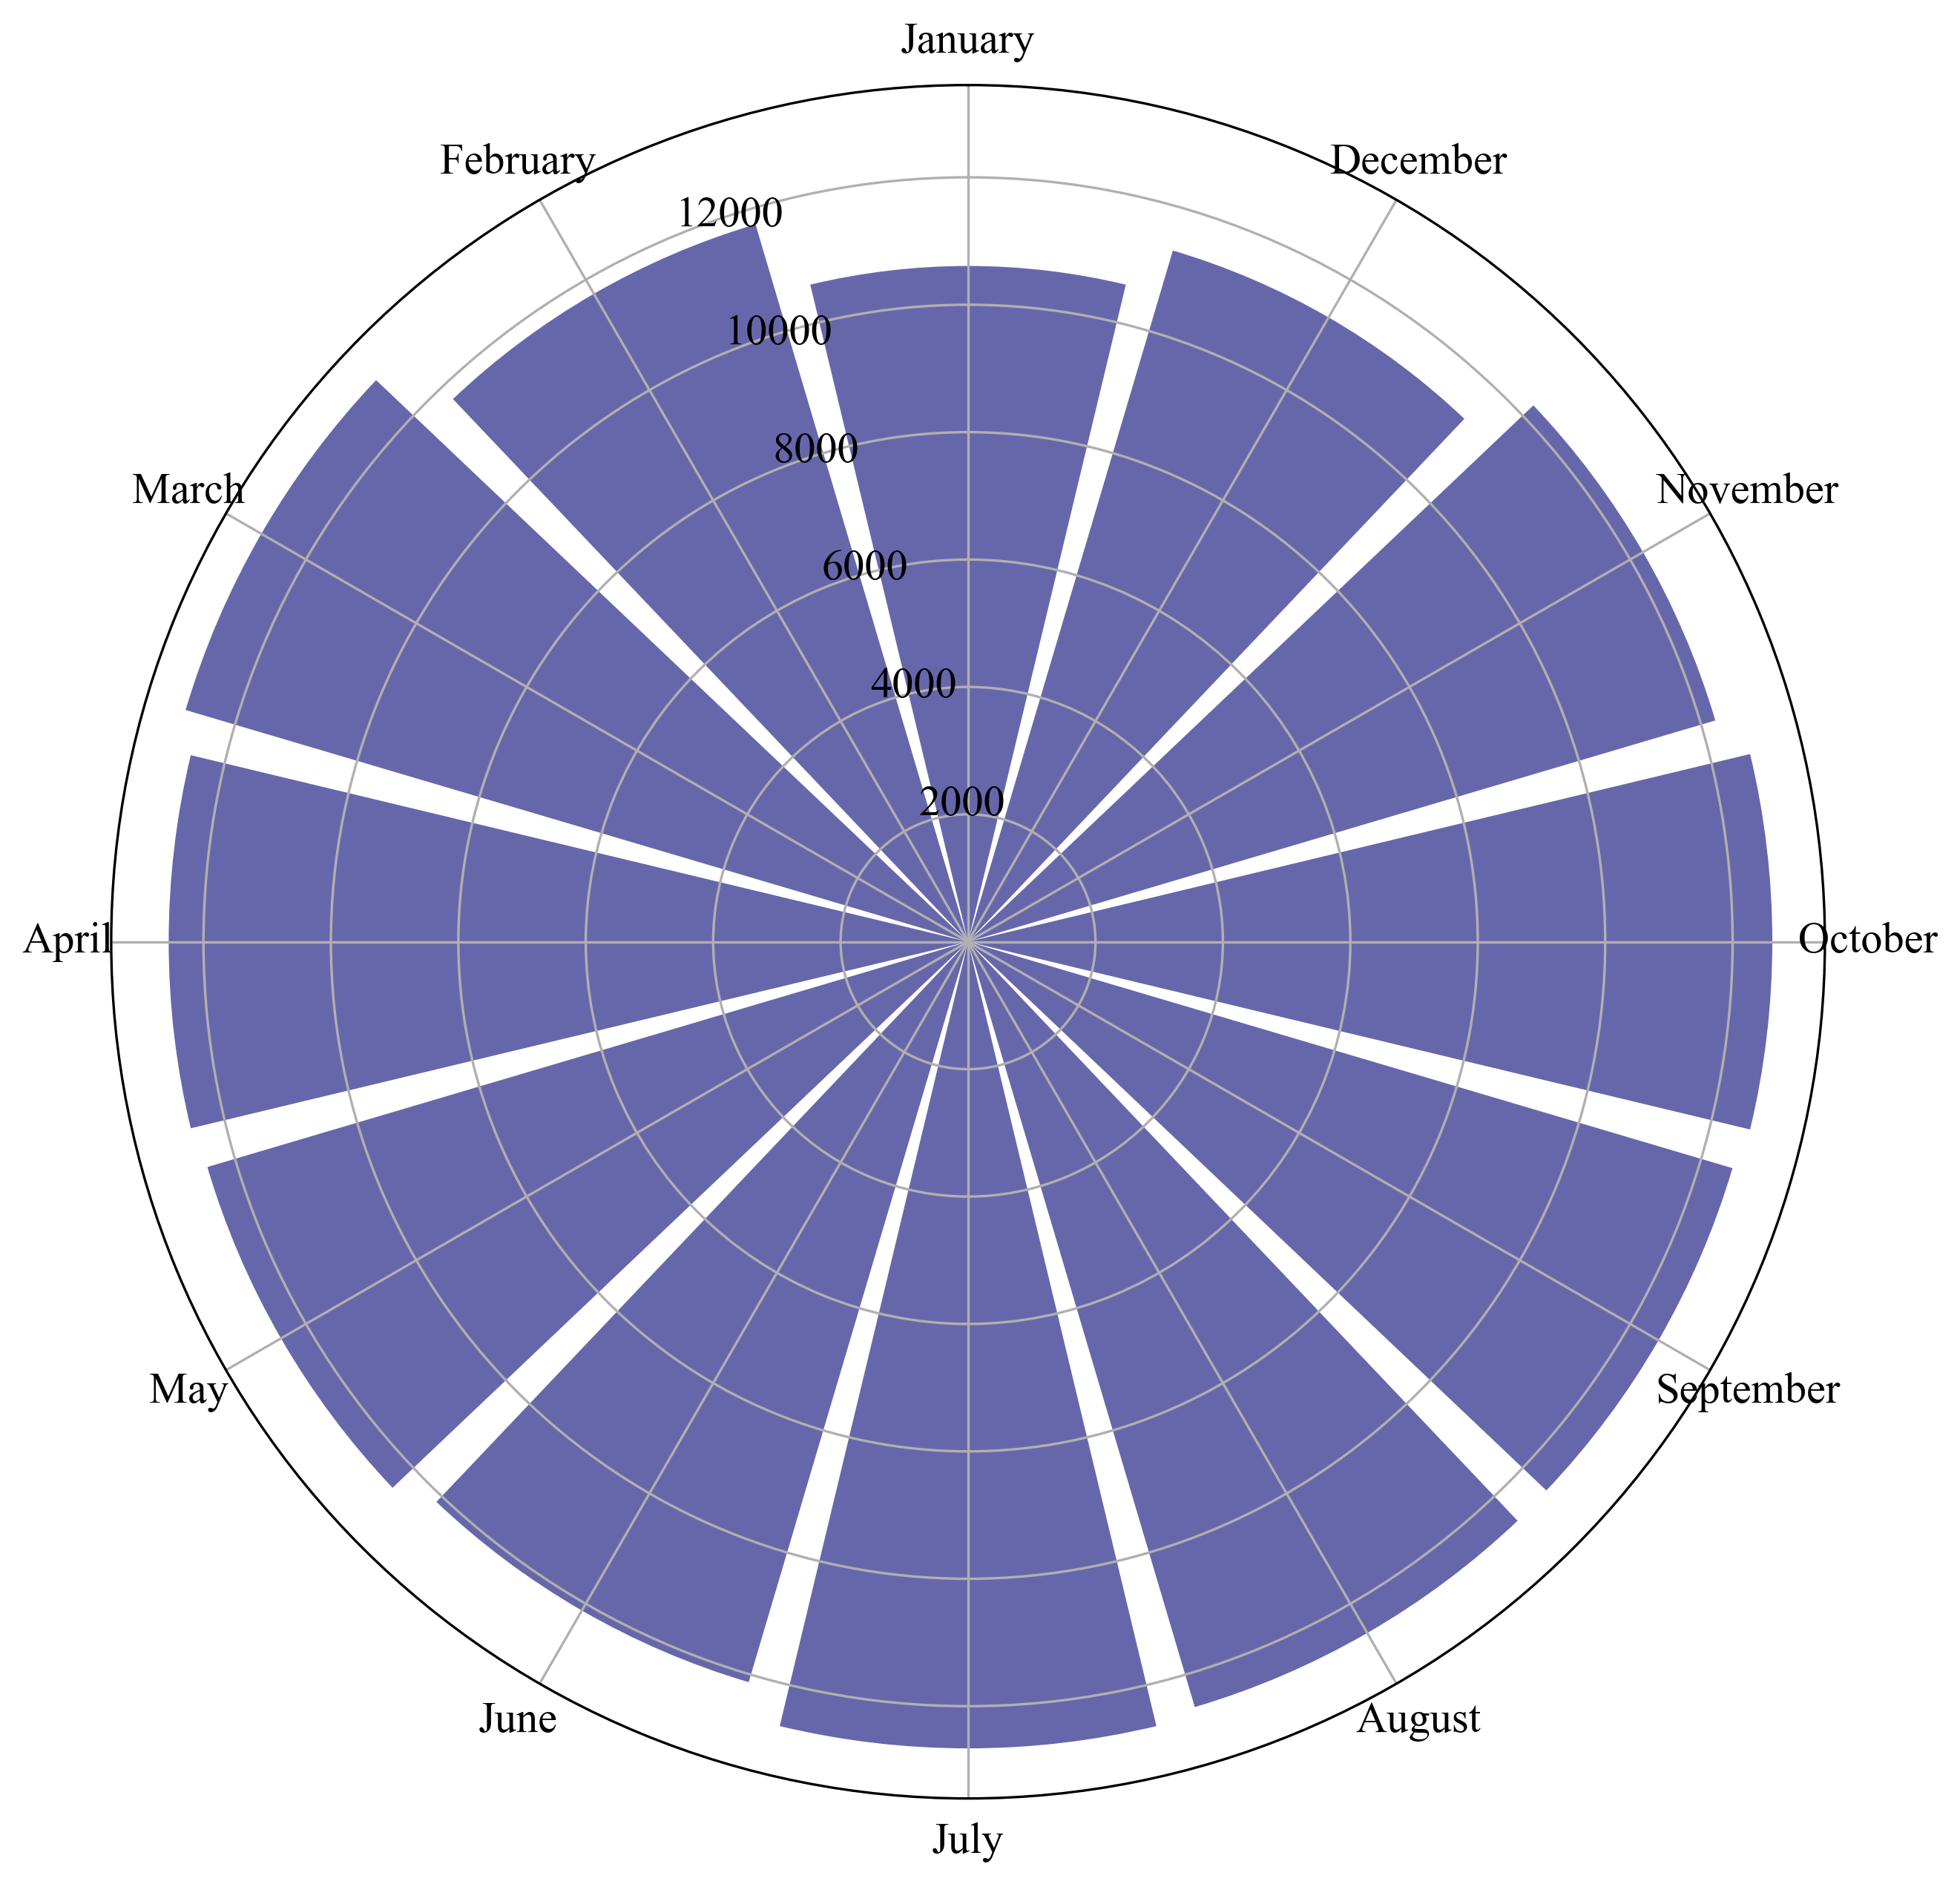

In [98]:
if makeplot

    N = 12
    theta = LinRange(0, 2 * π - π/6, N)
    width = (1.8 * π) / N
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=true)
    ax.set_thetagrids(collect(0:30:330), Dates.monthname.(1:12), color="k")
    ax.set_theta_zero_location("N")
    bars = ax.bar(theta, monthcount, width=width, color=mycolor)
    plt.savefig(joinpath(figdir, "time_histogram_month_polar"), dpi=300, bbox_inches="tight")
    # plt.close()
end

## Spatial distribution

In [99]:
if makeplot

    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)
    ax.plot(lon, lat, "ko", markersize=1, transform=datacrs)
    ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                          linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)
    ax.set_title("Locations of the observations")
    plt.savefig(joinpath(figdir, "location_obs"), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
end

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/ctroupin/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'axes'")
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 977, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 3058, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2295, in print_figure
    self.figure.draw(renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 2846, in draw
    renderer, self, artists, self.suppressComposite)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py", line 372, in draw
    gl._draw_gridliner(background_patch=self.background_patch)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py", line 370, in _draw_gridliner
    self._add_gridline_label(x, axis='x', upper_end=False)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py", line 254, in _add_gridline_label
    str_value = self.xformatter(value)
  File "/home/ctroupin/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/ticker.py", line 48, in __call__
    if not isinstance(self.axis.axes, GeoAxes):


### Finmarchicus

In [92]:
if makeplot
    countmin = 5
    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)
    ax.scatter(lon, lat, s=.1, lw=.1, color="k", transform=datacrs)
    indexplot = findall(calanus_finmarchicus .>= countmin)
    scat = ax.scatter(lon[indexplot], lat[indexplot], s=1, c=calanus_finmarchicus[indexplot], 
                      cmap=plt.cm.inferno_r, vmin=countmin, vmax=50., transform=datacrs)

    cb = plt.colorbar(scat, extend="both")

    ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                          linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)
    ax.set_title("Calanus_finmarchicus observations")

    plt.savefig(joinpath(figdir, "count_calanus_finmarchicus2.jpg"), dpi=300, bbox_inches="tight")

    plt.show()
end

#### Location of zeros

In [93]:
zerosloc1 = findall(calanus_finmarchicus .== 0.)
lonz1 = lon[zerosloc1]
latz1 = lat[zerosloc1]
zerosloc2 = findall(calanus_helgolandicus .== 0.)
lonz2 = lon[zerosloc2]
latz2 = lat[zerosloc2]

if makeplot

    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)
    #ax.scatter(0, 0, s=2, lw=.1, alpha=.95, color=mycolor, transform=datacrs, label="0's for Calanus finmarchicus")
    #ax.scatter(0, 0, s=2, lw=.1, alpha=.95, color="#FF9935", transform=datacrs, label="0's for Calanus helgolandicus")
    ax.scatter(lonz1, latz1, s=.5, lw=.1, alpha=.5, color=mycolor, transform=datacrs)
    #ax.scatter(lonz2, latz2, s=.5, lw=.1, alpha=.5, color="#FF9935", transform=datacrs)
    #ax.legend()

    ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                          linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)
    ax.set_title("Zeros for Calanus finmarchicus")

    plt.savefig(joinpath(figdir, "zeros_calanus_finmarchicus3.jpg"), dpi=300, bbox_inches="tight")

    plt.close()

    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)
    ax.scatter(lonz2, latz2, s=.5, lw=.1, alpha=.5, color=mycolor, transform=datacrs)

    ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                          linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)
    ax.set_title("Zeros for Calanus helgolandicus")

    plt.savefig(joinpath(figdir, "zeros_calanus_helgolandicus3.jpg"), dpi=300, bbox_inches="tight")

    plt.show()
end

In [94]:
length(lonz1)/length(lon), length(latz2)/length(lat)

(0.7259951559271474, 0.6285184526334515)

#### Calanus helgolandicus

In [95]:
if makeplot

    countmin = 5
    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=mainproj)

    ax.scatter(lon[calanus_helgolandicus .> 0], lat[calanus_helgolandicus .> 0], 
        s=.1, lw=.1, color="k", transform=datacrs)
    indexplot = findall(calanus_helgolandicus .>= countmin)
    scat = ax.scatter(lon[indexplot], lat[indexplot], s=1, c=calanus_helgolandicus[indexplot], 
                      cmap=plt.cm.inferno_r, vmin=countmin, vmax=50., transform=datacrs)

    cb = plt.colorbar(scat, extend="both")

    ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                          linewidth=.5, color="gray", alpha=1, linestyle="--")
    gl.top_labels = false
    gl.right_labels = false
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter
    gl.xlabel_style = Dict("size" => 10)
    gl.ylabel_style = Dict("size" => 10)
    ax.set_title("Calanus helgolandicus observations")

    plt.savefig(joinpath(figdir, "count_calanus_helgolandicus2.jpg"), dpi=300, bbox_inches="tight")

    plt.close()
end